In [79]:
import os
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [85]:
### setting ###
resize_idx = 4

modes = ['train', 'val']

class Cities:
    train_city = ['aachen/', 'bochum/', 'bremen/', 'cologne/', 'darmstadt/', 'dusseldorf/',
              'erfurt/', 'hamburg/', 'hanover/', 'jena/', 'krefeld/', 'monchengladbach/',
              'strasbourg/', 'stuttgart/', 'tubingen/', 'ulm/', 'weimar/', 'zurich/']
    val_city = ['frankfurt/', 'lindau/', 'munster/']

class ROOTDIR:
    img = "/Users/singku/Downloads/leftImg8bit_trainvaltest/leftImg8bit/"
    label = "/Users/singku/Downloads/gtFine_trainvaltest/gtFine/"

class outputDIR:
    img = "/Users/singku/Downloads/data/image/"
    label = "/Users/singku/Downloads/data/label/"

In [81]:
### label resize and save ###
for mode in modes:
    i = 1
    if mode == "train":
        cities = Cities.train_city
    else:
        cities = Cities.val_city
    
    for city in cities:
        for data in glob.glob(f"{ROOTDIR.label + mode}/{city}*_gtFine_color.png"):
            label = Image.open(data)
            w, h = label.size
            label_small = label.resize((int(w/resize_idx), int(h/resize_idx)))
            label_small.save(f"{outputDIR.label + mode}/{mode}{i:04d}.png", "png")
            i += 1

2975 500
(512, 256)
(256, 512, 3)


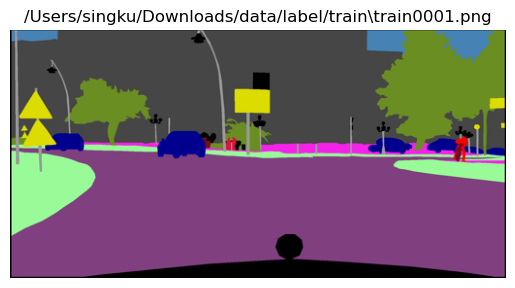

In [82]:
### check if files are correctly saved ###
train_lables = glob.glob(f"{outputDIR.label}train/*.png")
val_labels = glob.glob(f"{outputDIR.label}val/*.png")
print(len(train_lables), len(val_labels))

ex = Image.open(train_lables[0]).convert("RGB")
print(ex.size)

ex_np = np.array(ex)
print(ex_np.shape)

plt.imshow(ex)
plt.title(train_lables[0])
plt.axis('off')
plt.show()

In [89]:
### image resize and save ###
for mode in modes:
    i = 1
    
    if mode == "train":
        cities = Cities.train_city
    else:
        cities = Cities.val_city
    
    for city in cities:
        for data in glob.glob(f"{ROOTDIR.img + mode}/{city}*.png"):
            image = Image.open(data)
            w, h = image.size
            image_small = image.resize((int(w/resize_idx), int(h/resize_idx)))
            image_small.save(f"{outputDIR.img + mode}/{mode}{i:04d}.png", "png")
            i += 1

2975 500
(512, 256)
(256, 512, 3)


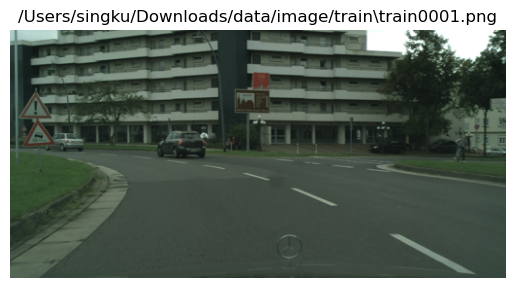

In [90]:
### check if files are correctly saved ###
train_images = glob.glob(f"{outputDIR.img}train/*.png")
val_images = glob.glob(f"{outputDIR.img}val/*.png")
print(len(train_images), len(val_images))

ex = Image.open(train_images[0]).convert("RGB")
print(ex.size)

ex_np = np.array(ex)
print(ex_np.shape)

plt.imshow(ex)
plt.title(train_images[0])
plt.axis('off')
plt.show()